<a href="https://colab.research.google.com/github/spdr-lily/projeto-de-data-science-com-dados-do-titanic/blob/main/projeto_de_data_science_com_dados_do_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [9]:
# coleta e preparação de dados
url = 'https://raw.githubusercontent.com/diyadatascience/Titanic-Dataset/refs/heads/main/titanic_train.csv'
data = pd.read_csv(url)

In [10]:
# visualizar primeiras linhas do dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# limpeza e preparação dos dados
# removendo colunas irrelevantes e preencher valores ausentes
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-1106329502.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
/tmp/ipython-input-1106329502.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [13]:
# converter variaveis categoricas em variaveis dummies
data = pd.get_dummies(data, drop_first=True)

In [15]:
# separando dados em conjuntos de treino e teste
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# treinando o modelo com randomforest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# avaliação do modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Acurácia:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

Acurácia: 0.8156424581005587


In [18]:
# exibindo a importancia das caracteristicas do modelo
importances = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
importances = importances.sort_values('importance', ascending=False)
print(importances)

      feature  importance
4        Fare    0.260333
1         Age    0.246354
6    Sex_male    0.165226
5  Sex_female    0.121002
0      Pclass    0.085756
2       SibSp    0.047468
3       Parch    0.036340
9  Embarked_S    0.015626
7  Embarked_C    0.014304
8  Embarked_Q    0.007592


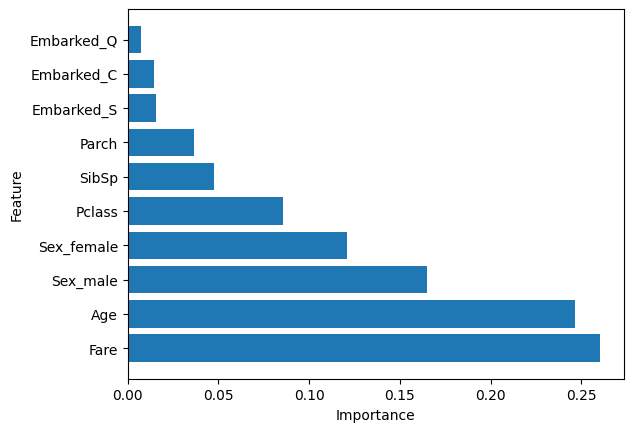

In [19]:
# exibindo um grafico de barras mostrando a importância das variáveis em ordem decrescente
plt.barh(importances['feature'], importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()